# Cohort Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from operator import attrgetter

## 1. Load Dataset

In [3]:
df = pd.read_csv(
    'cohort_analysis.csv',
    parse_dates=['InvoiceDate'],
    dtype={'CustomerID':str}
)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-04-01 10:00:00,1.95,13313,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-04-01 10:00:00,2.10,13313,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-04-01 10:00:00,1.25,13313,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379979 entries, 0 to 379978
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    379979 non-null  object        
 1   StockCode    379979 non-null  object        
 2   Description  379979 non-null  object        
 3   Quantity     379979 non-null  int64         
 4   InvoiceDate  379979 non-null  datetime64[ns]
 5   UnitPrice    379979 non-null  float64       
 6   CustomerID   379979 non-null  object        
 7   Country      379979 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 23.2+ MB


## 2. Data Preprocessing

Kita butuh dataframe berisi 4 kolom:
1. Cohort Date:
    - Tanggal/Waktu aktifitas pertama dari seorang user (contoh: tanggal transaksi pertama, tanggal login pertama, bulan transaksi pertama)
    <br><br>
2. Current Activity Date:
    - Tanggal/waktu saat user mengulangi aktifitasnya (contoh: tanggal transaksi ke-2, tanggal transaksi ke-3, dst)
    <br><br>
3. Total distinct Subject:
    - Total unique user berdasarkan Cohort Date dan Current Activity Date
    <br><br>
4. Period Distance:
    - Jarak waktu antara Cohort Date ke Current Activity Date (nilainya paling kecil 0)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-04-01 10:00:00,1.95,13313,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-04-01 10:00:00,2.10,13313,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-04-01 10:00:00,1.25,13313,United Kingdom


In [6]:
df.groupby('Country')['Quantity'].sum()

Country
Australia                 83199
Austria                    4824
Bahrain                     260
Belgium                   21397
Brazil                      356
Canada                     2763
Channel Islands            9399
Cyprus                     5400
Czech Republic              592
Denmark                    7734
EIRE                     131471
European Community          497
Finland                    9412
France                   104870
Germany                  110725
Greece                     1556
Iceland                    2139
Israel                     4046
Italy                      7706
Japan                     21125
Lebanon                     386
Malta                       944
Netherlands              193317
Norway                    15665
Poland                     3513
Portugal                  15099
RSA                         352
Saudi Arabia                 75
Singapore                  5234
Spain                     25957
Sweden                    31923


In [7]:
df['sum_Quantity_by_Country'] = df.groupby('Country')['Quantity'].transform('sum')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sum_Quantity_by_Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-04-01 10:00:00,1.95,13313,United Kingdom,3755721
1,539993,21499,BLUE POLKADOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom,3755721
2,539993,21498,RED RETROSPOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom,3755721
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-04-01 10:00:00,2.10,13313,United Kingdom,3755721
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-04-01 10:00:00,1.25,13313,United Kingdom,3755721


In [8]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sum_Quantity_by_Country
379974,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680,France,104870
379975,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680,France,104870
379976,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680,France,104870
379977,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680,France,104870
379978,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-09-12 12:50:00,4.95,12680,France,104870


---
Lanjut Cohort Analysis

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sum_Quantity_by_Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-04-01 10:00:00,1.95,13313,United Kingdom,3755721
1,539993,21499,BLUE POLKADOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom,3755721
2,539993,21498,RED RETROSPOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom,3755721
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-04-01 10:00:00,2.10,13313,United Kingdom,3755721
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-04-01 10:00:00,1.25,13313,United Kingdom,3755721


### 1. Cohort Month
Buat kolom bernama 'cohort_month' dengan mencari bulan pertama (bulan minimum) dari transaksi tiap customer.

In [10]:
df['cohort_month'] = df.groupby('CustomerID')['InvoiceDate'].transform('min')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sum_Quantity_by_Country,cohort_month
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-04-01 10:00:00,1.95,13313,United Kingdom,3755721,2011-04-01 10:00:00
1,539993,21499,BLUE POLKADOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom,3755721,2011-04-01 10:00:00
2,539993,21498,RED RETROSPOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom,3755721,2011-04-01 10:00:00
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-04-01 10:00:00,2.10,13313,United Kingdom,3755721,2011-04-01 10:00:00
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-04-01 10:00:00,1.25,13313,United Kingdom,3755721,2011-04-01 10:00:00


https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases 

In [11]:
df['cohort_month'] = df['cohort_month'].dt.to_period('M')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sum_Quantity_by_Country,cohort_month
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-04-01 10:00:00,1.95,13313,United Kingdom,3755721,2011-04
1,539993,21499,BLUE POLKADOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom,3755721,2011-04
2,539993,21498,RED RETROSPOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom,3755721,2011-04
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-04-01 10:00:00,2.10,13313,United Kingdom,3755721,2011-04
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-04-01 10:00:00,1.25,13313,United Kingdom,3755721,2011-04


In [17]:
df[df['CustomerID']=='13313']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sum_Quantity_by_Country,cohort_month
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-04-01 10:00:00,1.95,13313,United Kingdom,3755721,2011-04
1,539993,21499,BLUE POLKADOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom,3755721,2011-04
2,539993,21498,RED RETROSPOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom,3755721,2011-04
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-04-01 10:00:00,2.10,13313,United Kingdom,3755721,2011-04
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-04-01 10:00:00,1.25,13313,United Kingdom,3755721,2011-04
...,...,...,...,...,...,...,...,...,...,...
333606,577099,23203,JUMBO BAG VINTAGE DOILY,10,2011-11-17 16:48:00,2.08,13313,United Kingdom,3755721,2011-04
333607,577099,22303,COFFEE MUG APPLES DESIGN,6,2011-11-17 16:48:00,2.55,13313,United Kingdom,3755721,2011-04
333608,577099,22302,COFFEE MUG PEARS DESIGN,6,2011-11-17 16:48:00,2.55,13313,United Kingdom,3755721,2011-04
333609,577099,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,16,2011-11-17 16:48:00,0.65,13313,United Kingdom,3755721,2011-04


## 2. Current Order Month
Buat kolom bernama 'current_order_month' berisi dibulan apa saja seorang customer melakukan transaksi

In [12]:
df['current_order_month'] = df['InvoiceDate'].dt.to_period('M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sum_Quantity_by_Country,cohort_month,current_order_month
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-04-01 10:00:00,1.95,13313,United Kingdom,3755721,2011-04,2011-04
1,539993,21499,BLUE POLKADOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom,3755721,2011-04,2011-04
2,539993,21498,RED RETROSPOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom,3755721,2011-04,2011-04
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-04-01 10:00:00,2.10,13313,United Kingdom,3755721,2011-04,2011-04
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-04-01 10:00:00,1.25,13313,United Kingdom,3755721,2011-04,2011-04


In [13]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sum_Quantity_by_Country,cohort_month,current_order_month
379974,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680,France,104870,2011-08,2011-09
379975,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680,France,104870,2011-08,2011-09
379976,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680,France,104870,2011-08,2011-09
379977,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680,France,104870,2011-08,2011-09
379978,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-09-12 12:50:00,4.95,12680,France,104870,2011-08,2011-09


## 3. n_customers
Buat kolom 'n_customers' berisi jumlah unique customers berdasarkan 'cohort_month' dan 'current_order_month'

In [14]:
df_cohort = df.groupby(by=['cohort_month','current_order_month']).nunique()[['CustomerID']].reset_index()
df_cohort = df_cohort.rename(columns={'CustomerID':'n_customers'})

df_cohort

,cohort_month,current_order_month,n_customers
0,2011-01,2011-01,967
1,2011-01,2011-02,320
2,2011-01,2011-03,368
3,2011-01,2011-04,338
4,2011-01,2011-05,381
...,...,...,...
73,2011-10,2011-11,53
74,2011-10,2011-12,10
75,2011-11,2011-11,244
76,2011-11,2011-12,11


### 4. period_number
Buat kolom 'period_number' berisih selisih bulan antara 'cohort_month' ke 'current_order_month'

In [38]:
df_cohort['periode_number'] = (df_cohort['current_order_month'] - df_cohort['cohort_month'])
df_cohort['periode_number'] = df_cohort['periode_number'].apply(attrgetter('n'))

df_cohort.head()

,cohort_month,current_order_month,n_customers,periode_number,max_customers,n_customers_percent
0,2011-01,2011-01,967,0,967,100.00
1,2011-01,2011-02,320,1,967,33.09
2,2011-01,2011-03,368,2,967,38.06
3,2011-01,2011-04,338,3,967,34.95
4,2011-01,2011-05,381,4,967,39.40


In [39]:
df_cohort_pivot = df_cohort.pivot_table(
    index='cohort_month',
    columns='periode_number',
    values='n_customers'
)
df_cohort_pivot

periode_number,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2011-01,967.0,320.0,368.0,338.0,381.0,397.0,396.0,341.0,417.0,413.0,481.0,191.0
2011-02,542.0,137.0,142.0,166.0,166.0,173.0,162.0,169.0,172.0,202.0,59.0,NaN
2011-03,500.0,109.0,121.0,123.0,129.0,113.0,120.0,137.0,144.0,35.0,NaN,NaN
2011-04,383.0,86.0,84.0,82.0,75.0,76.0,106.0,98.0,24.0,NaN,NaN,NaN
2011-05,309.0,61.0,64.0,54.0,77.0,58.0,88.0,23.0,NaN,NaN,NaN,NaN
2011-06,314.0,57.0,55.0,64.0,61.0,87.0,21.0,NaN,NaN,NaN,NaN,NaN
2011-07,252.0,50.0,47.0,53.0,66.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,186.0,32.0,44.0,52.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09,255.0,40.0,55.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_cohort_pivot[0]

cohort_month
2011-01    967.0
2011-02    542.0
2011-03    500.0
2011-04    383.0
2011-05    309.0
2011-06    314.0
2011-07    252.0
2011-08    186.0
2011-09    255.0
2011-10    266.0
2011-11    244.0
2011-12     26.0
Freq: M, Name: 0, dtype: float64

In [19]:
# n_customers diubah menjadi percent

df_cohort_percent = (df_cohort_pivot.div(df_cohort_pivot[0], axis=0) * 100).round(2)
df_cohort_percent

periode_number,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2011-01,100.0,33.09,38.06,34.95,39.40,41.05,40.95,35.26,43.12,42.71,49.74,19.75
2011-02,100.0,25.28,26.20,30.63,30.63,31.92,29.89,31.18,31.73,37.27,10.89,NaN
2011-03,100.0,21.80,24.20,24.60,25.80,22.60,24.00,27.40,28.80,7.00,NaN,NaN
2011-04,100.0,22.45,21.93,21.41,19.58,19.84,27.68,25.59,6.27,NaN,NaN,NaN
2011-05,100.0,19.74,20.71,17.48,24.92,18.77,28.48,7.44,NaN,NaN,NaN,NaN
2011-06,100.0,18.15,17.52,20.38,19.43,27.71,6.69,NaN,NaN,NaN,NaN,NaN
2011-07,100.0,19.84,18.65,21.03,26.19,3.97,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,100.0,17.20,23.66,27.96,5.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09,100.0,15.69,21.57,2.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

cara lain

In [20]:
# cara lain cari n_customer dalam percent
df_cohort['max_customers'] = df_cohort.groupby('cohort_month')['n_customers'].transform('max')
df_cohort.head()

,cohort_month,current_order_month,n_customers,periode_number,max_customers
0,2011-01,2011-01,967,0,967
1,2011-01,2011-02,320,1,967
2,2011-01,2011-03,368,2,967
3,2011-01,2011-04,338,3,967
4,2011-01,2011-05,381,4,967


In [21]:
# n_customers dijadikan percent
df_cohort['n_customers_percent'] = (df_cohort['n_customers'] / df_cohort['max_customers'] * 100).round(2)
df_cohort.head()

,cohort_month,current_order_month,n_customers,periode_number,max_customers,n_customers_percent
0,2011-01,2011-01,967,0,967,100.00
1,2011-01,2011-02,320,1,967,33.09
2,2011-01,2011-03,368,2,967,38.06
3,2011-01,2011-04,338,3,967,34.95
4,2011-01,2011-05,381,4,967,39.40


In [41]:
# buat pivot table untuk menampilkan persentase customer berdsasarkan
# cohort_month dan period_number

df_cohort.pivot_table(index='cohort_month',
                      columns='periode_number',
                      values='n_customers_percent')

periode_number,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2011-01,100.0,33.09,38.06,34.95,39.40,41.05,40.95,35.26,43.12,42.71,49.74,19.75
2011-02,100.0,25.28,26.20,30.63,30.63,31.92,29.89,31.18,31.73,37.27,10.89,NaN
2011-03,100.0,21.80,24.20,24.60,25.80,22.60,24.00,27.40,28.80,7.00,NaN,NaN
2011-04,100.0,22.45,21.93,21.41,19.58,19.84,27.68,25.59,6.27,NaN,NaN,NaN
2011-05,100.0,19.74,20.71,17.48,24.92,18.77,28.48,7.44,NaN,NaN,NaN,NaN
2011-06,100.0,18.15,17.52,20.38,19.43,27.71,6.69,NaN,NaN,NaN,NaN,NaN
2011-07,100.0,19.84,18.65,21.03,26.19,3.97,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,100.0,17.20,23.66,27.96,5.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09,100.0,15.69,21.57,2.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Visualization: Heatmap

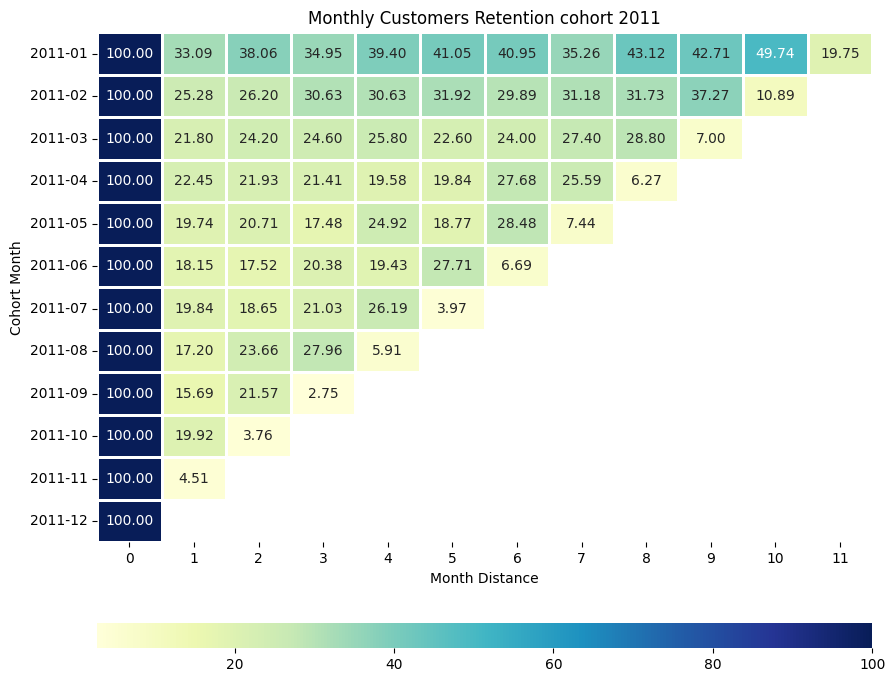

In [43]:
grid_kw = {
    'height_ratios':(20,1),
    'hspace': 0.3
}

fig, (ax_top, ax_bottom) = plt.subplots(nrows=2, ncols=1, figsize=(10,8), gridspec_kw=grid_kw)

# heatmap
ax_top = sns.heatmap(
    data=df_cohort_percent,
    cmap='YlGnBu',
    ax=ax_top,
    cbar_ax=ax_bottom,
    cbar_kws={'orientation':'horizontal'},
    annot=True,
    fmt='.2f',
    linewidths=2
)

ax_top.set_title('Monthly Customers Retention cohort 2011')
ax_top.set_xlabel('Month Distance')
ax_top.set_ylabel('Cohort Month')
ax_top.set_yticklabels(labels=df_cohort_percent.index, rotation=0)
plt.show()